# SAMPLING METHODS

##### Author: Sharon Veerayah-McGregor
###### Python Example on Statistics

In [1]:
import pandas as pd
import numpy as np

##### Probablistic way of Sampling Method

In [69]:
data = pd.read_csv('SAMPLE.csv')
data.head()

,GROUP,SAT,GPA
0,C,650,3.18
1,C,420,2.42
2,C,550,2.63
3,C,570,2.83
4,C,530,2.51


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GROUP   1000 non-null   object 
 1   SAT     1000 non-null   int64  
 2   GPA     1000 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB


In [73]:
print("Mean of GPA: " , data.GPA.mean())
print("Total rows: ", len(data))

Mean of GPA:  2.4679499999999996
Total rows:  1000


In [74]:
data.describe()

,SAT,GPA
count,1000.000000,1000.000000
mean,489.340000,2.467950
std,82.339202,0.740805
min,240.000000,0.000000
25%,430.000000,1.980000
50%,490.000000,2.465000
75%,540.000000,3.020000
max,760.000000,4.000000


## SIMPLE RANDOM SAMPLING

In [75]:
simple_random_sample = data.sample(n = 150).sort_values(by='GROUP')
print("Simple Random Sample Size: ", len(simple_random_sample))
SRS_mean = round(simple_random_sample['GPA'].mean(), 2)
print("Simple Random Sample Mean for GPA: ", SRS_mean)

Simple Random Sample Size:  150
Simple Random Sample Mean for GPA:  2.54


## SYSTEMATIC SAMPLING

In [76]:
# Let us select every nth element (here every 3rd element)
systematic_sampling = data[data.index%3 ==0]
print("Sytematic Sampling Sample size: ", len(systematic_sampling))
systematic_sampling_mean = round(systematic_sampling['GPA'].mean(), 2)
print("Systematic Sampling Mean: " , systematic_sampling_mean)

Sytematic Sampling Sample size:  334
Systematic Sampling Mean:  2.44


## CLUSTER BASED SAMPLING

In [77]:
#Divide entire data into different clusters

##### First create clusters

In [78]:
#We will create a group with 25 rows in each clusters. 
group_size = 25
cluster_data = data
#Creating new group ID
cluster_data['New_ID'] = np.repeat([range(1,group_size+1)], len(cluster_data)/group_size)
cluster_data.head()

,GROUP,SAT,GPA,New_ID
0,C,650,3.18,1
1,C,420,2.42,1
2,C,550,2.63,1
3,C,570,2.83,1
4,C,530,2.51,1


In [79]:
cluster_data.tail()

,GROUP,SAT,GPA,New_ID
995,E,600,2.48,25
996,E,500,2.98,25
997,E,440,3.40,25
998,E,430,2.15,25
999,E,500,2.19,25


#### Apply systematic selection nth point

In [80]:
# Let us select every nth element (here every 3rd element)
cluster_sampling = cluster_data[cluster_data.New_ID%3 ==0]
print("Sytematic Sampling Sample size: ", len(cluster_sampling))
cluster_sampling_mean = round(cluster_sampling['GPA'].mean(), 2)
print("Systematic Sampling Mean: " , cluster_sampling_mean)

Sytematic Sampling Sample size:  320
Systematic Sampling Mean:  2.45


## STRATIFIED SAMPLING

In [81]:
data = pd.read_csv('SAMPLE.csv')
data.head()

,GROUP,SAT,GPA
0,C,650,3.18
1,C,420,2.42
2,C,550,2.63
3,C,570,2.83
4,C,530,2.51


*  I want to check the distribution of the Research be retained in my sampling

In [82]:
n = 50
stratified_sampling= data.groupby('GROUP', group_keys=False).apply(lambda x:x.sample(int(np.rint(n*len(x)/len(data))))).sample(frac=1).reset_index(drop=True)
print(len(stratified_sampling))
stratified_sample_mean = round(stratified_sampling['GPA'].mean(),2)
print("Stratified Mean: ", stratified_sample_mean )

50
Stratified Mean:  2.45


## ===========================================

# CENTRAL TENDENCY

In [83]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew, kurtosis

In [84]:
data = pd.read_csv('SAMPLE.csv')
data.head()

,GROUP,SAT,GPA
0,C,650,3.18
1,C,420,2.42
2,C,550,2.63
3,C,570,2.83
4,C,530,2.51


In [85]:
data1 = data.copy()
data1.head()

,GROUP,SAT,GPA
0,C,650,3.18
1,C,420,2.42
2,C,550,2.63
3,C,570,2.83
4,C,530,2.51


#### DATA DISTRIBUTION

Text(0, 0.5, 'Probabiity')

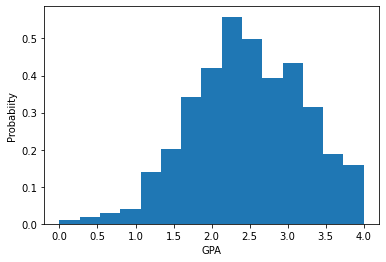

In [86]:
plt.hist(data1['GPA'], density = True, bins =15)
plt.xlabel("GPA")
plt.ylabel("Probabiity")

## CENTRAL TENDENCY

In [88]:
print("Mean of GRE Scores: ", data1['GPA'].mean() )
print("Median of GRE Scores: ", data1['GPA'].median())
print("Mode of GRE Scores:\n", data1['GPA'].mode())
print("Zero or close to zero means it is Normally Distributed")
print("==============================================")
print("Skewness of data: ", skew(data1['GPA']))
print("==============================================")
#Check for Positive or Negative Skewness
print("Kurtosis: ", kurtosis(data1['GPA']))


Mean of GRE Scores:  2.4679499999999996
Median of GRE Scores:  2.465
Mode of GRE Scores:
 0    2.24
dtype: float64
Zero or close to zero means it is Normally Distributed
Skewness of data:  -0.21606096144624667
Kurtosis:  -0.19471451980736143


### PERCENTILES

In [90]:
#To understand values across different percentile
#Here I am spacing on 10 percentage interval
print("Data is selected up to the 90th percentile: ")
data1['GPA'].quantile(np.linspace(0.1, 1, 9, 0))

Data is selected up to the 90th percentile: 


0.1    1.520
0.2    1.830
0.3    2.080
0.4    2.280
0.5    2.465
0.6    2.660
0.7    2.910
0.8    3.142
0.9    3.420
Name: GPA, dtype: float64

### VARIANCE
* We want to measure how far each value goes from the mean

In [92]:
var =np.var(data1['GPA'])
print("Variance: ", var)

Variance of GPA:  0.5482434975000017


In [96]:

SD =np.std(data1['GPA'])
print("Standard Deviation: ", SD)
#Manual calculation of SD
STD= np.sqrt(var)
STD

Standard Deviation:  0.7404346679484974


0.7404346679484974

In [97]:
### STANDARD ERROR

In [100]:
print("Standard Error Measure: ", stats.sem(data1['GPA']))

Standard Error Measure:  0.02342631618052206


##### DIfference between SD and SEM

- SD : to understandability of the data - how far it deviates from the mean
- SEM: how accurate is the estimated population Mean calculated

# RELATIONSHIP MEASURES AND DISTRIBUTION

In [102]:
data.head()

,GROUP,SAT,GPA
0,C,650,3.18
1,C,420,2.42
2,C,550,2.63
3,C,570,2.83
4,C,530,2.51


### COVARIANCE
- just tells us if two variables are positively or negatively to each other or not

In [103]:
data.cov()

,SAT,GPA
SAT,6779.744144,24.483731
GPA,24.483731,0.548792


### CORRELATION
- Always between -1 and 1; how strongly they are related to each other
- If close to 1 , very strongly related to each other

In [104]:
data.corr()

,SAT,GPA
SAT,1.00000,0.40139
GPA,0.40139,1.00000


In [105]:
# LEt us test the SAT value by increasing the values
data['SAT'] = data['SAT']*100

In [106]:
data.head()

,GROUP,SAT,GPA
0,C,65000,3.18
1,C,42000,2.42
2,C,55000,2.63
3,C,57000,2.83
4,C,53000,2.51


* the relationship remains the same

In [107]:
data.cov()

,SAT,GPA
SAT,6.779744e+07,2448.373073
GPA,2.448373e+03,0.548792


In [108]:
data.corr()

,SAT,GPA
SAT,1.00000,0.40139
GPA,0.40139,1.00000
